#  Predicting Fraudulent Transactions

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt



In [13]:
import warnings
warnings.filterwarnings('ignore')

## Dataset Link- https://www.kaggle.com/datasets/venkateshblks/fraudulent-transactions

### Data Details

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
df=pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df[df.duplicated]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

**Cash-out and payment has higher data points. Debit has lowest**

In [9]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

## Data Visualization

In [34]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


<Axes: xlabel='step'>

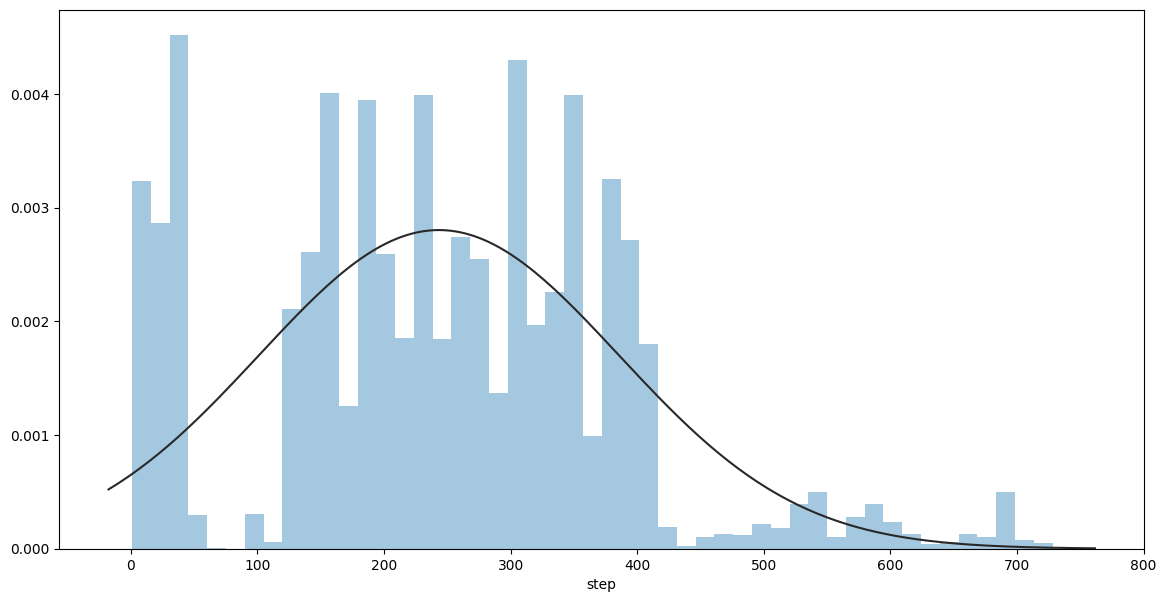

In [16]:
from scipy.stats import norm
plt.rcParams['figure.figsize'] =(14, 7)

sns.distplot(df.step, fit = norm, kde = False)

<Axes: xlabel='type', ylabel='count'>

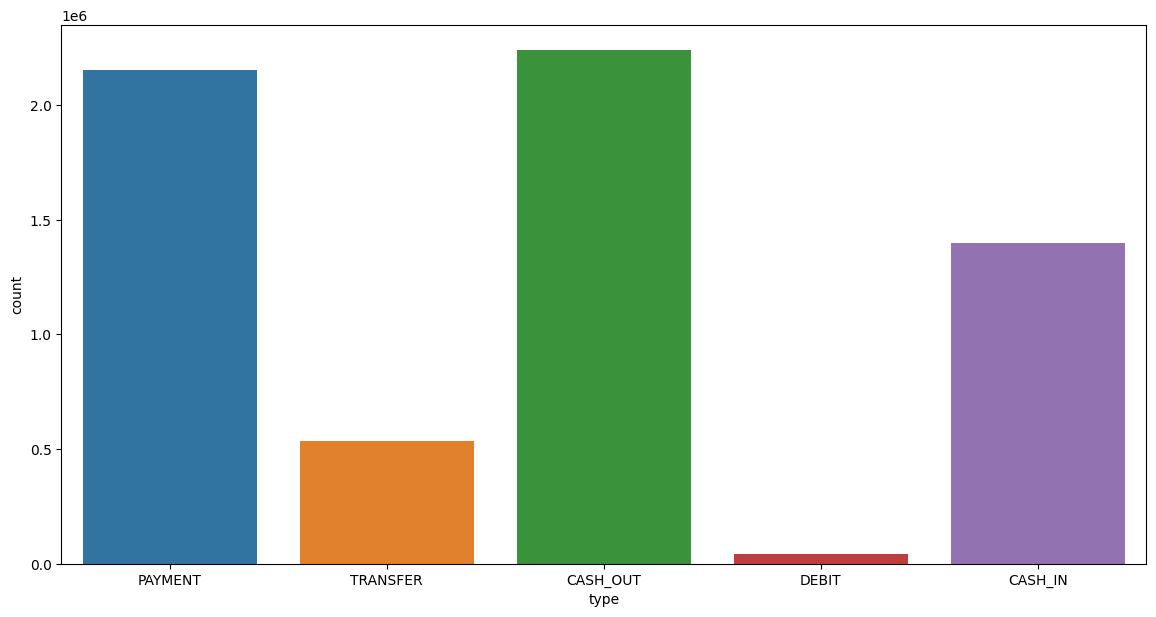

In [19]:
sns.countplot(df,x='type')

<Axes: xlabel='isFraud', ylabel='count'>

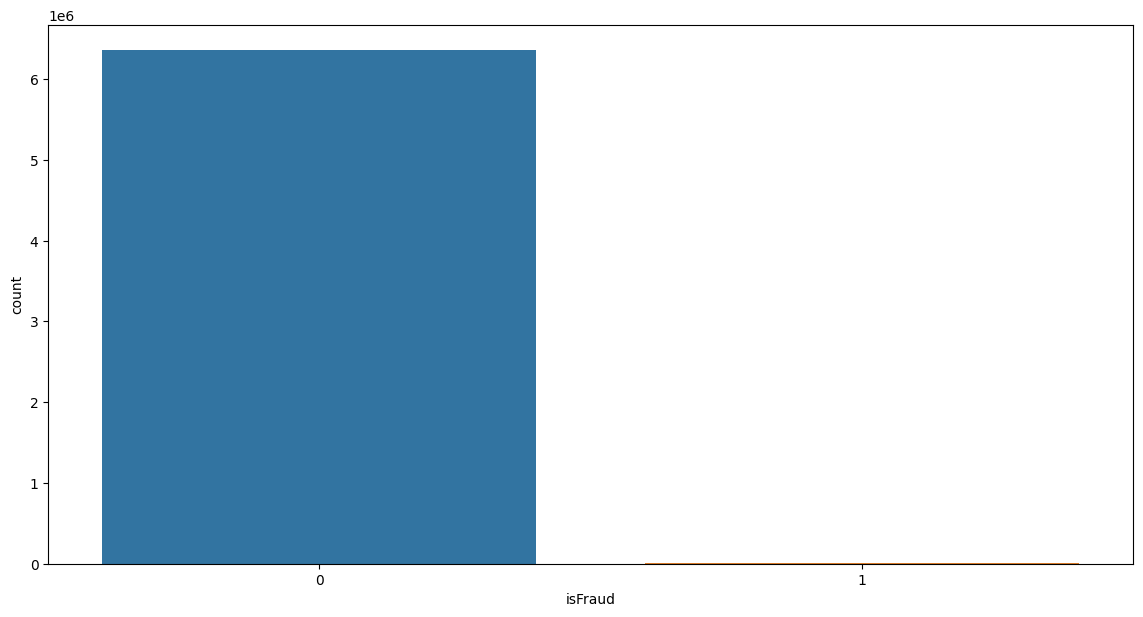

In [20]:
sns.countplot(df,x='isFraud')

([<matplotlib.patches.Wedge at 0x7bdf1b95eb90>,
 [Text(-1.099990955625572, 0.004460666087110192, 'Not a Fraud'),
  Text(1.0999909559371663, -0.004460589247970448, 'Fraud')])

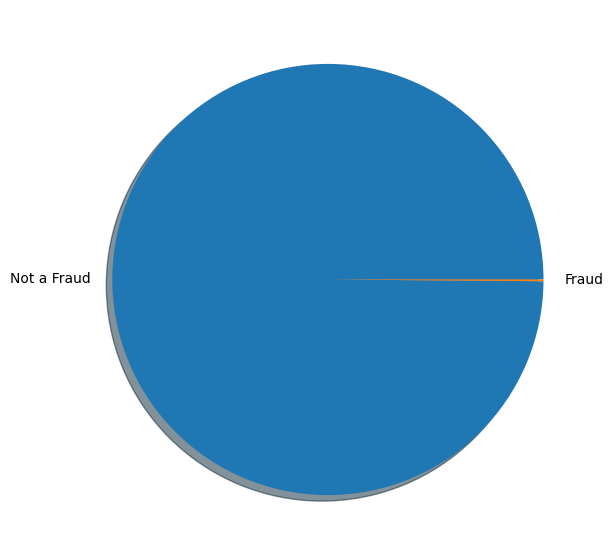

In [22]:
plt.pie(df.isFraud.value_counts(), labels = ['Not a Fraud', 'Fraud'],   shadow = True)

In [23]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<Axes: xlabel='amount'>

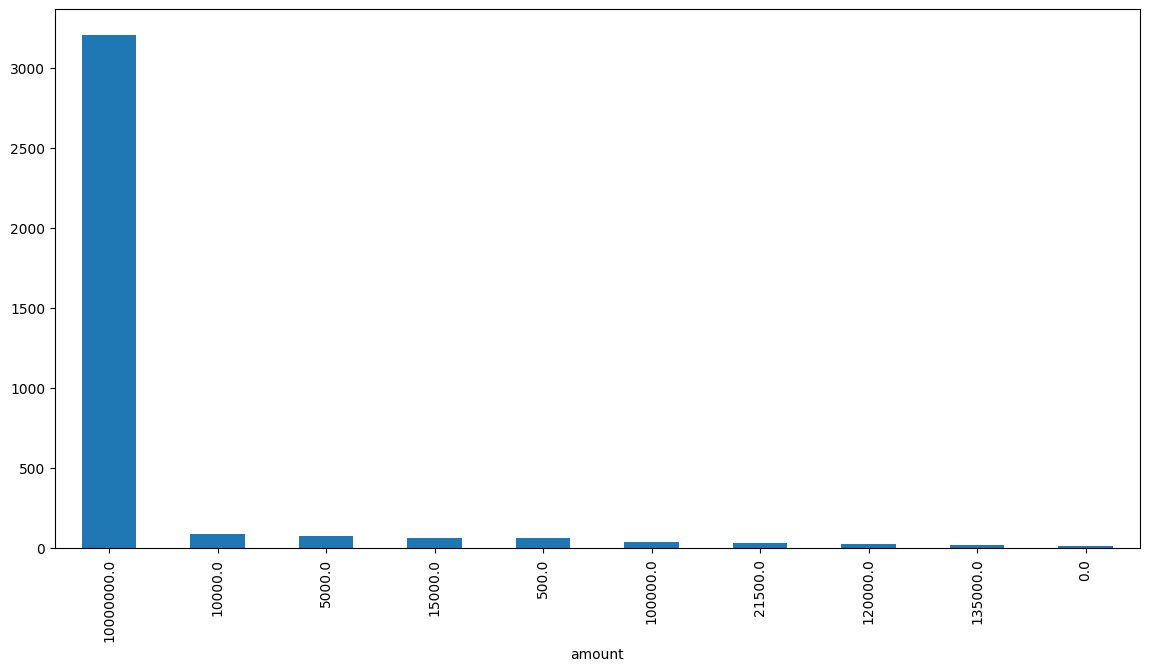

In [32]:
df.amount.value_counts().head(10).plot(kind='bar')

<Axes: ylabel='amount'>

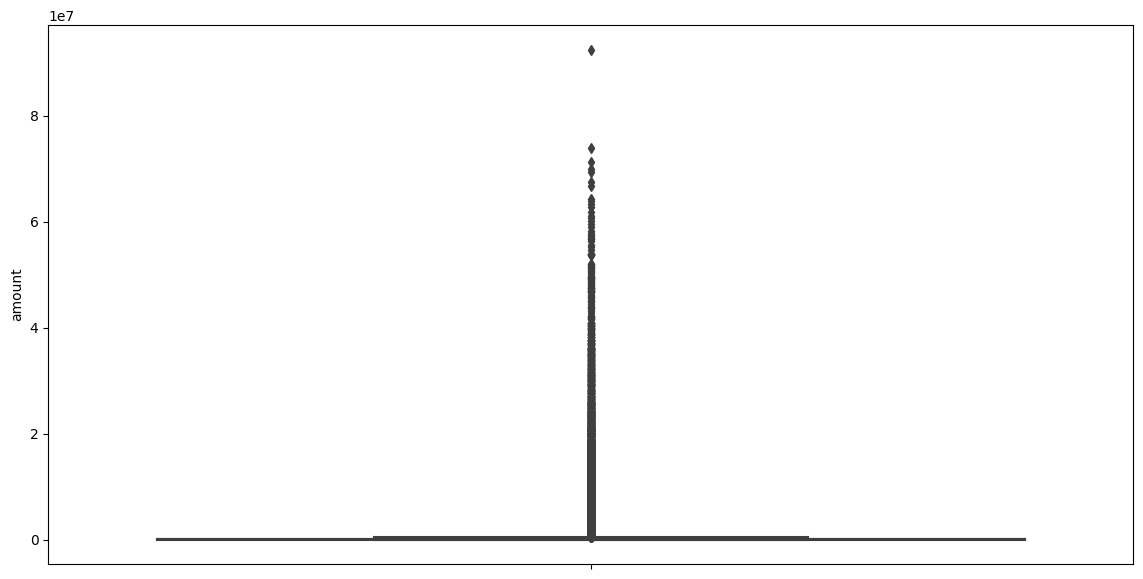

In [59]:
import plotly.express as px
sns.boxplot(df, y="amount")

In [69]:
num_col= df.select_dtypes(include=['number'])
num_col.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

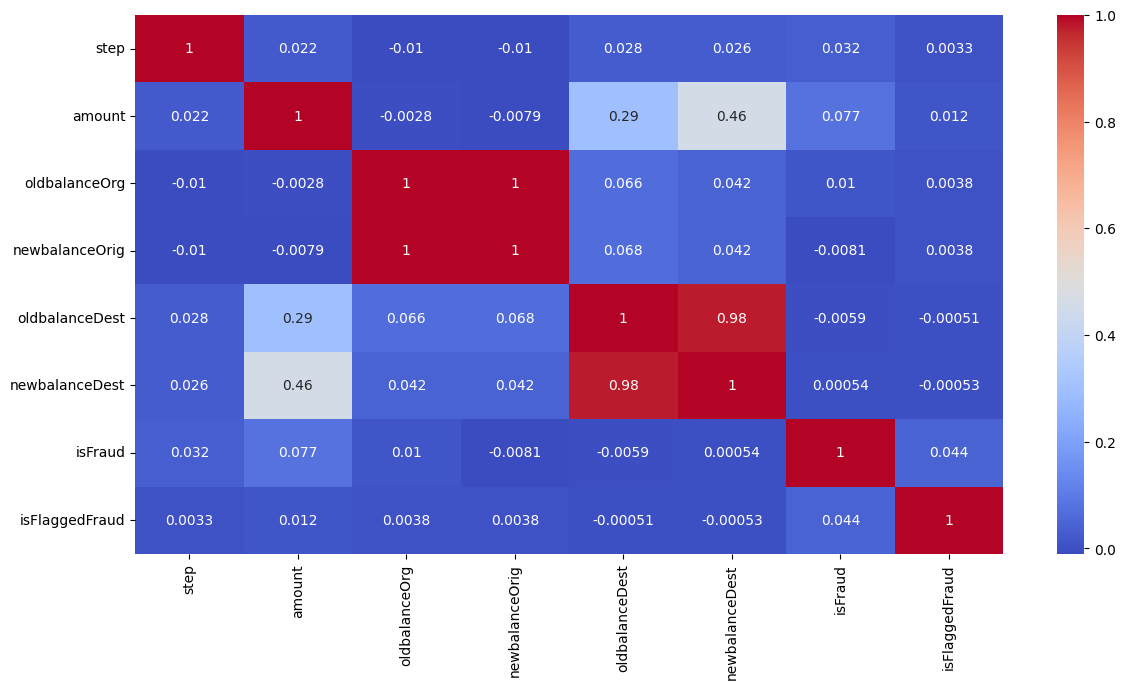

In [41]:
sns.heatmap(num_col.corr(),annot=True, cmap='coolwarm',)

   **'oldbalanceOrg', 'newbalanceOrig', are highly correlated**

   **'newbalancdest', 'oldbalanceDest'  are highly correlated**
   

## Analysis

In [35]:
df.loc[df.isFlaggedFraud == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


**All the isFlaggedFraud rows have the type=Transfer**

In [47]:
df.loc[df.isFraud == 1].type.value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

**So, only when the type is 'cash_out' or 'Transfer' is the transaction flagged as fraud**

In [53]:
pd.pivot_table(df,index=["type"], values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.mean,np.std], margins=True)

sum                                  mean                 \
                amount isFlaggedFraud isFraud         amount isFlaggedFraud   
type                                                                          
CASH_IN   2.363674e+11              0       0  168920.242004       0.000000   
CASH_OUT  3.944130e+11              0    4116  176273.964346       0.000000   
DEBIT     2.271992e+08              0       0    5483.665314       0.000000   
PAYMENT   2.809337e+10              0       0   13057.604660       0.000000   
TRANSFER  4.852920e+11             16    4097  910647.009645       0.000030   
All       1.144393e+12             16    8213  179861.903549       0.000003   

                             std                           
           isFraud        amount isFlaggedFraud   isFraud  
type                                                       
CASH_IN   0.000000  1.265083e+05       0.000000  0.000000  
CASH_OUT  0.001840  1.753297e+05       0.000000  0.042851  
DEBIT     0.000000  1.331854e+04       0.000000  0.000000  
PAYMENT   0.000000  1.255645e+04       0.000000  0.000000  
TRANSFER  0.007688  1.879574e+06       0.005479  0.087344  
All       0.001291  6.038582e+05       0.001586  0.035905

**there has been no flags during fraud transactions incase of cash_out , which a serious concern to the anti money laundering system . Also there are only 16 transactions which are flagged as fraud whereas around 4k transactions are actually fraud.**

In [60]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [62]:
df.nameDest.value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M295304806       1
M33419717        1
M1940055334      1
M335107734       1
M1757317128      1
Name: count, Length: 2722362, dtype: int64

In [70]:
df.nameOrig.value_counts()

nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C1567523029    1
C644777639     1
C1256645416    1
C1231536757    1
C1971151096    1
Name: count, Length: 6353307, dtype: int64

In [4]:
import re  
df['nameOrig'] = df['nameOrig'].apply(lambda x: re.sub('C[A-Za-z0-9]*', 'C',x)) 
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('C[A-Za-z0-9]*','C',x))   
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('M[A-Za-z0-9]*','M',x)) 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0


In [16]:
df.nameDest.value_counts()

nameDest
C    4211125
M    2151495
Name: count, dtype: int64

In [5]:
df.nameOrig.value_counts()

C    6362620
Name: nameOrig, dtype: int64

In [6]:
df=df.drop('nameOrig',axis=1)

In [7]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,M,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,M,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,C,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,C,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,M,0.0,0.0,0,0


## Feature Encoding

In [77]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [8]:
df1=df[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.0,C,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.0,C,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,15325.0,0.0,C,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,705.0,0.0,C,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,10835.0,0.0,C,6267.0,2719172.89,0,0


In [9]:
df1.shape

(2770409, 10)

In [14]:
nameDe_map={'M':2,
            'C':1
           }
type_map={'CASH_OUT':1,
         'PAYMENT':2,
         "CASH_IN":3,
         "TRANSFER":4,
         "DEBIT":5}
# df1=df.copy()
df1['type']=df['type'].map(type_map)
df1['nameDest']=df['nameDest'].map(nameDe_map)
df1.tail(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,1,339682.13,339682.13,0.0,1,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.0,1,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.0,1,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.0,1,0.00,0.00,1
6362619,743,1,850002.52,850002.52,0.0,1,6510099.11,7360101.63,1


In [11]:
df1=df1.drop('isFlaggedFraud',axis=1)
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,4,181.00,181.0,0.0,1,0.0,0.00,1
3,1,1,181.00,181.0,0.0,1,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,1,5083.0,51513.44,0
19,1,4,215310.30,705.0,0.0,1,22425.0,0.00,0
24,1,4,311685.89,10835.0,0.0,1,6267.0,2719172.89,0


In [15]:
df1.nameDest.value_counts()

1    2770409
Name: nameDest, dtype: int64

In [16]:
df1=df1.drop('nameDest',axis=1)
df1.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,4,181.00,181.0,0.0,0.0,0.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0


In [17]:
df1.nunique()

step                  743
type                    2
amount            2685805
oldbalanceOrg      435702
newbalanceOrig     271977
oldbalanceDest    2360852
newbalanceDest    2562844
isFraud                 2
dtype: int64

## Standardizing the numerical columns

In [18]:
df2=df1.copy()

In [19]:
from sklearn.preprocessing import StandardScaler

col_names=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
features = df1[col_names]
scaler = StandardScaler().fit(features.values)
features_train = scaler.transform(features.values)
df2[col_names] = features_train
df2.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,4,-0.357467,-0.188847,-0.106389,-0.403155,-0.438259,1
3,1,1,-0.357467,-0.188847,-0.106389,-0.398142,-0.438259,1
15,1,1,-0.099576,-0.128591,-0.106389,-0.401952,-0.427245,0


In [20]:
df2.nunique()

step                  743
type                    2
amount            2685805
oldbalanceOrg      435702
newbalanceOrig     271977
oldbalanceDest    2360852
newbalanceDest    2562844
isFraud                 2
dtype: int64

In [21]:
df2.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

## TensorFlow Decision Tree(TFDF) model

In [25]:
# !pip install xgboost

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [7]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

4453901 examples in training, 1908719 examples in testing.


In [38]:
y_true=valid_ds_pd['isFraud']
y_true

0          0
10         0
13         0
16         0
19         0
          ..
6362605    1
6362609    1
6362610    1
6362612    1
6362617    1
Name: isFraud, Length: 1908719, dtype: int64

In [10]:
# !pip install tensorflow_decision_forests

In [11]:
import tensorflow_decision_forests as tfdf

In [14]:
label = 'isFraud'
# train_all= tfdf.keras.pd_dataframe_to_tf_dataset(df, label=label, )
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [15]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [18]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")
rf.compile(metrics=["mse"])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpqk0lzizg as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:36.088994. Found 4453901 examples.
Training model...


In [21]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=4453901, accuracy=0.9996968949242473, loss=0.0015748016021877962, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [22]:
for importance in inspector.variable_importances().keys():
  print("\t", importance)

	 NUM_NODES
	 NUM_AS_ROOT
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH


In [23]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("amount" (1; #1), 128.0),
 ("type" (4; #10), 103.0),
 ("newbalanceOrig" (1; #6), 24.0),
 ("oldbalanceOrg" (1; #8), 16.0),
 ("isFlaggedFraud" (1; #2), 9.0),
 ("newbalanceDest" (1; #5), 7.0),
 ("oldbalanceDest" (1; #7), 7.0),
 ("step" (1; #9), 6.0)]

In [44]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

In [26]:
preds = rf.predict(valid_ds)
pred=preds.squeeze()
pred

1909/1909 [==============================] - 78s 41ms/step


array([0.        , 0.00333333, 0.        , ..., 0.99999917, 0.99999917,
       0.99999917], dtype=float32)

In [36]:

pred_y=np.where(pred < 0.5, 0, 1)
pred_y

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
accuracy_score(pred_y,y_true)

0.9997108008040995

In [42]:
print(classification_report(pred_y,y_true))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906769
           1       0.78      0.99      0.88      1950

    accuracy                           1.00   1908719
   macro avg       0.89      1.00      0.94   1908719
weighted avg       1.00      1.00      1.00   1908719



In [45]:
confusion_matrix(y_true,pred_y)

array([[1906230,      13],
       [    539,    1937]])

## Model Building

In [27]:

X=df2.drop(['isFraud'],axis=1)
y=df2['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,)
X_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3144001,236,1,-0.076191,-0.189568,-0.106389,-0.327594,-0.316561
6203183,585,1,-0.246885,0.016218,-0.106389,-0.400766,-0.415071
4998566,353,1,0.068762,0.698796,-0.106389,-0.377659,-0.334278
5383905,376,1,-0.172818,-0.189568,-0.106389,-0.293840,-0.304407
5795711,401,1,-0.297552,-0.023548,-0.106389,-0.403155,-0.426848
...,...,...,...,...,...,...,...
4725016,332,4,0.064980,-0.139612,-0.106389,-0.403155,-0.358032
3305116,252,1,-0.204765,-0.126008,-0.106389,-0.403155,-0.409235
4731846,332,4,-0.185439,-0.189568,-0.106389,-0.362483,-0.368820
2964279,231,4,3.637813,-0.189568,-0.106389,1.153315,1.726400


In [28]:
X_test.shape

(831123, 7)

In [31]:
y_test.value_counts()

0    828739
1      2384
Name: isFraud, dtype: int64

In [45]:
X_test.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [46]:
# X_train=X_train.drop(['nameOrig','nameDest'],axis=1)
# X_train = X_train.reset_index(drop=True)

# X_test=X_test.drop(['nameOrig','nameDest'],axis=1)
# X_test = X_test.reset_index(drop=True)


In [41]:
# with tpu_strategy.scope():
logreg_cv = LogisticRegression(solver='liblinear')
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear')
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rf_cv]

# for i,model in enumerate(cv_models):
#     print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=2, scoring ='accuracy').mean()))

In [42]:
print("{} Test Accuracy: {}".format(cv_dict[0],cross_val_score(logreg_cv, X_train, y_train, cv=10, scoring ='accuracy',n_jobs=-1).mean()))

Logistic Regression Test Accuracy: 0.998248324377443


In [59]:
print("{} Test Accuracy: {}".format(cv_dict[1],cross_val_score(cv_models[], X_train, y_train, cv=3, scoring ='accuracy',n_jobs=-1).mean()))

Decision Tree Test Accuracy: 0.999217753329841


In [43]:
print("{} Test Accuracy: {}".format(cv_dict[2],cross_val_score(cv_models[2], X_train, y_train, cv=3, scoring ='accuracy',n_jobs=-1).mean()))

KNN Test Accuracy: 0.9986180480716453


In [65]:
print("{} Test Accuracy: {}".format(cv_dict[4],cross_val_score(nb_cv, X_train, y_train, cv=10, scoring ='accuracy',n_jobs=-1).mean()))

Naive Bayes Test Accuracy: 0.9832474427222626


In [34]:
from joblib import Parallel, delayed
import multiprocessing
n=multiprocessing.cpu_count() 

8

In [44]:
def evaluate_model(model, X_test, y_test, model_name, metrics_df):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC-AUC': [roc_auc]
    })
    if new_row.Model.iloc[0] not  in metrics_df['Model'].values:
      metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 30)
    return metrics_df
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

In [45]:
log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X_train, y_train)
metrics_df = evaluate_model(log_reg, X_test, y_test, 'Logistic Regression', metrics_df)
metrics_df

[[828603    136]
 [  1384   1000]]
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828739
           1       0.88      0.42      0.57      2384

    accuracy                           1.00    831123
   macro avg       0.94      0.71      0.78    831123
weighted avg       1.00      1.00      1.00    831123

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.998171,0.880282,0.419463,0.568182,0.95132


In [47]:
random_forest = RandomForestClassifier(n_jobs=-1)
random_forest.fit(X_train, y_train)
metrics_df=evaluate_model(random_forest, X_test, y_test, 'Random Forest', metrics_df)
metrics_df

[[828703     36]
 [   520   1864]]
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828739
           1       0.98      0.78      0.87      2384

    accuracy                           1.00    831123
   macro avg       0.99      0.89      0.93    831123
weighted avg       1.00      1.00      1.00    831123

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.998171,0.880282,0.419463,0.568182,0.951320
1,Random Forest,0.999331,0.981053,0.781879,0.870215,0.993742


In [48]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train, y_train)

metrics_df=evaluate_model(xgb, X_test, y_test, 'XGBoost', metrics_df)
metrics_df

[[828652     87]
 [   349   2035]]
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828739
           1       0.96      0.85      0.90      2384

    accuracy                           1.00    831123
   macro avg       0.98      0.93      0.95    831123
weighted avg       1.00      1.00      1.00    831123

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.998171,0.880282,0.419463,0.568182,0.951320
1,Random Forest,0.999331,0.981053,0.781879,0.870215,0.993742
2,XGBoost,0.999475,0.959001,0.853607,0.903240,0.998683


In [66]:
nb=GaussianNB()
nb.fit(X_train, y_train)

metrics_df=evaluate_model(nb, X_test, y_test, 'Naive Bayes', metrics_df)
metrics_df

[[816366  12373]
 [  1418    966]]
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    828739
           1       0.07      0.41      0.12      2384

    accuracy                           0.98    831123
   macro avg       0.54      0.70      0.56    831123
weighted avg       1.00      0.98      0.99    831123

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.998171,0.880282,0.419463,0.568182,0.951320
1,Random Forest,0.999331,0.981053,0.781879,0.870215,0.993742
2,XGBoost,0.999475,0.959001,0.853607,0.903240,0.998683
3,Naive Bayes,0.983407,0.072419,0.405201,0.122877,0.900152


In [ ]:
# gradient_boosting = GradientBoostingClassifier()
# gradient_boosting.fit(X_train, y_train)

# metrics_df=evaluate_model(gradient_boosting, X_test, y_test, 'Gradient Boosting', metrics_df)
# metrics_df

In [61]:
# q=XGBClassifier(n_jobs=-1)
# q.fit(X_train, y_train)

## Hyperparameter tuning

In [62]:

from sklearn.model_selection import GridSearchCV

In [67]:
# Define the parameter grid for hyperparameter tuning

param_grid = {
    'learning_rate': [ 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
xgb_classifier = XGBClassifier()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='recall', n_jobs=-1)

# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [68]:

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params


{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300}

In [69]:
best_xgb_classifier = XGBClassifier( **best_params,n_jobs=-1)
best_xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
metrics_df=evaluate_model(best_xgb_classifier, X_test, y_test, 'best xgb classifier', metrics_df)
metrics_df

[[828626    113]
 [   312   2072]]
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828739
           1       0.95      0.87      0.91      2384

    accuracy                           1.00    831123
   macro avg       0.97      0.93      0.95    831123
weighted avg       1.00      1.00      1.00    831123

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.998171,0.880282,0.419463,0.568182,0.951320
1,Random Forest,0.999331,0.981053,0.781879,0.870215,0.993742
2,XGBoost,0.999475,0.959001,0.853607,0.903240,0.998683
3,Naive Bayes,0.983407,0.072419,0.405201,0.122877,0.900152
4,best xgb classifier,0.999489,0.948284,0.869128,0.906982,0.998734


### Based on the metrics above, we can say that the "best xgb classifier" is the best model compared to all the others